<a href="https://colab.research.google.com/github/Robertkok1234567890/testing-dli/blob/main/data%20lead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SECTION: Setup

In [15]:
# Install required packages
!pip install imbalanced-learn gdown --quiet

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Fix random seed
np.random.seed(42)


SECTION: Data Loading (Google Drive)

In [16]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset from Drive (UPDATE path accordingly)
file_path = '/content/drive/MyDrive/phishing-dataset/phishdata.csv'
df = pd.read_csv(file_path)

# Display dataset shape and preview
print("Dataset Shape:", df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Shape: (101219, 18)


,URL,url_length,has_ip_address,dot_count,https_flag,url_entropy,token_count,subdomain_count,query_param_count,tld_length,path_length,has_hyphen_in_domain,number_of_digits,tld_popularity,suspicious_file_extension,domain_name_length,percentage_numeric_chars,ClassLabel
0,https://keraekken-loagginnusa.godaddysites.com/,47,0,2,1,4.250669,6,1,1,3,1,1,0,1,0,12,0.0,0.0
1,https://metamsk01lgiix.godaddysites.com/,40,0,2,1,4.196439,6,1,1,3,1,0,2,1,0,12,5.0,0.0
2,http://myglobaltech.in/,23,0,1,0,3.936180,5,0,1,2,1,0,0,0,0,12,0.0,0.0
3,http://djtool-for-spotify.com/,30,0,1,0,3.894740,5,0,1,3,1,1,0,1,0,18,0.0,0.0
4,https://scearmcoommunnlty.com/invent/freind/get,47,0,1,1,4.143127,7,0,1,3,18,0,0,1,0,17,0.0,0.0


SECTION: Pre-processing

In [21]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Drop rows with missing values (adjust if imputation is preferred)
df.dropna(inplace=True)


Missing values:
 URL                          0
url_length                   0
has_ip_address               0
dot_count                    0
https_flag                   0
url_entropy                  0
token_count                  0
subdomain_count              0
query_param_count            0
tld_length                   0
path_length                  0
has_hyphen_in_domain         0
number_of_digits             0
tld_popularity               0
suspicious_file_extension    0
domain_name_length           0
percentage_numeric_chars     0
ClassLabel                   0
dtype: int64


SECTION: Feature Documentation


🔎 Feature List:
1. URL — object
2. url_length — int64
3. has_ip_address — int64
4. dot_count — int64
5. https_flag — int64
6. url_entropy — float64
7. token_count — int64
8. subdomain_count — int64
9. query_param_count — int64
10. tld_length — int64
11. path_length — int64
12. has_hyphen_in_domain — int64
13. number_of_digits — int64
14. tld_popularity — int64
15. suspicious_file_extension — int64
16. domain_name_length — int64
17. percentage_numeric_chars — float64
18. ClassLabel — float64

📉 Class Distribution (Before SMOTE):
0.0 (Phishing): 63678
1.0 (Legitimate): 37540


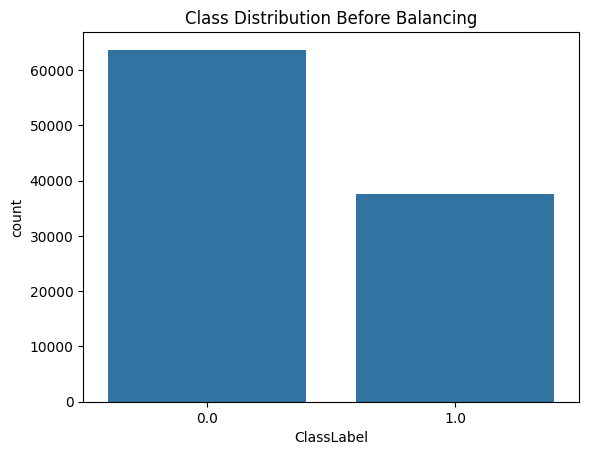

In [18]:
# Document feature list
print("\n🔎 Feature List:")
for i, col in enumerate(df.columns, start=1):
    dtype = str(df[col].dtype)
    print(f"{i}. {col} — {dtype}")

# Class distribution before balancing
print("\n📉 Class Distribution (Before SMOTE):")
class_counts = df[target_column].value_counts()
for label, count in class_counts.items():
    label_name = "Phishing" if label == 0 else "Legitimate"
    print(f"{label} ({label_name}): {count}")

# Visualize class distribution
sns.countplot(data=df, x=target_column)
plt.title("Class Distribution Before Balancing")
plt.show()


SECTION: Balancing Classes Using SMOTE

In [19]:
# Drop 'URL' column if present (not numerical)
X = df.drop(columns=[target_column, 'URL']) if 'URL' in df.columns else df.drop(columns=[target_column])
y = df[target_column]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Output class distribution after SMOTE
print("\n✅ Class Distribution (After SMOTE):")
for label, count in Counter(y_resampled).items():
    label_name = "Phishing" if label == 0 else "Legitimate"
    print(f"{label} ({label_name}): {count}")

# Reconstruct DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled[target_column] = y_resampled



✅ Class Distribution (After SMOTE):
0.0 (Phishing): 63678
1.0 (Legitimate): 63678


SECTION: Save Cleaned Dataset

In [20]:
# Save cleaned dataset to Google Drive
output_path = '/content/drive/MyDrive/phishing-dataset/cleaned_balanced_dataset.csv'
df_resampled.to_csv(output_path, index=False)
print(f"\n✅ Cleaned dataset saved to: {output_path}")



✅ Cleaned dataset saved to: /content/drive/MyDrive/phishing-dataset/cleaned_balanced_dataset.csv


textttt

In [22]:
df.head()

,URL,url_length,has_ip_address,dot_count,https_flag,url_entropy,token_count,subdomain_count,query_param_count,tld_length,path_length,has_hyphen_in_domain,number_of_digits,tld_popularity,suspicious_file_extension,domain_name_length,percentage_numeric_chars,ClassLabel
0,https://keraekken-loagginnusa.godaddysites.com/,47,0,2,1,4.250669,6,1,1,3,1,1,0,1,0,12,0.0,0.0
1,https://metamsk01lgiix.godaddysites.com/,40,0,2,1,4.196439,6,1,1,3,1,0,2,1,0,12,5.0,0.0
2,http://myglobaltech.in/,23,0,1,0,3.936180,5,0,1,2,1,0,0,0,0,12,0.0,0.0
3,http://djtool-for-spotify.com/,30,0,1,0,3.894740,5,0,1,3,1,1,0,1,0,18,0.0,0.0
4,https://scearmcoommunnlty.com/invent/freind/get,47,0,1,1,4.143127,7,0,1,3,18,0,0,1,0,17,0.0,0.0
